# Hackathon

Data source from: https://ecos.fws.gov/ecp/report/table/critical-habitat.html

### Column Descriptions
- Scientific Name: Scientific name of the species as defined in the 50 CFR Part 17. The name is a hyperlink to the Species Profile report in which you may find additional information about the species including an online mapper of the species critical habitat if available.
- Where Listed: Where the species is listed under the Endangered Species Act as defined in the 50 CFR Part 17.
- FWS Lead Region: Lead region for the species. Click the hyperlink to access the homepage of the FWS region. From there you have access to contact information for the region.
- ESA Listing Status: Current listing status as defined in the 50 CFR Part 17.
Critical Habitat Type: Proposed / Final
Federal Register Publication: Authoritative source for the critical habitat designation.
Critical Habitat Shapefile: Downloadable spatial and metadata records for critical habitat area as defined in the Federal Register publication.
Acres and Miles: Spatially derived acres and/or stream miles based on the Critical Habitat Shapefile available here for download. These numbers may or may not exactly match the acres and/or stream miles listed in the corresponding Federal Register publication.

In [ ]:
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

In [ ]:
# import os

# # Specify the path to the desired directory
# target_directory = '/content/drive/My Drive/Mar_2025_buidling_blocs/'

# # Change the current working directory to the target directory
# os.chdir(target_directory)

# # Print the new current working directory
# print("Current Working Directory:", os.getcwd())


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('https://raw.githubusercontent.com/SamuelkohP04/ECOS-Endangered-Species-CSV/refs/heads/main/ECOS%20USFWS%20Threatened%20%20Endangered%20Species%20Active%20Critical%20Habitat%20Report.csv')
df.head()

,Entity ID,Common Name,Scientific Name,Where Listed,Species Group,FWS Lead Region,ESA Listing Status,Critical Habitat Type,Federal Register Publication,Critical Habitat Shapefile,tsn,Acres and Miles
0,1,"Bat, Indiana",Myotis sodalis,Wherever found,Mammals,Region 3,Endangered,Final,Federal Register (1977-09-22),Download,180001,9763890.9 acres
1,2,"Bear, grizzly",Ursus arctos horribilis,"U.S.A., conterminous (lower 48) States, except...",Mammals,Region 6,Threatened,Proposed,Federal Register (1976-11-05),NaN,202385,NaN
2,7,"Manatee, West Indian",Trichechus manatus,Wherever found,Mammals,Region 4,Threatened,Proposed,Federal Register (2024-09-24),Download,180684,1988617.7 acres
3,7,"Manatee, West Indian",Trichechus manatus,Wherever found,Mammals,Region 4,Threatened,Final,Federal Register (1977-09-22),NaN,180684,NaN
4,11,"Wolf, gray",Canis lupus,"U.S.A.: All of AL, AR, CA, CO, CT, DE, FL, GA,...",Mammals,Region 6,Endangered,Final,Federal Register (1978-03-09),NaN,180596,NaN


In [ ]:
df.isnull().sum()

,0
Entity ID,0
Common Name,0
Scientific Name,0
Where Listed,34
Species Group,0
FWS Lead Region,0
ESA Listing Status,0
Critical Habitat Type,0
Federal Register Publication,0
Critical Habitat Shapefile,104


In [ ]:
df['Where Listed'] = df['Where Listed'].fillna(df['Where Listed'].value_counts().index[0])
df['Critical Habitat Shapefile'] = df['Critical Habitat Shapefile'].fillna(df['Critical Habitat Shapefile'].value_counts().index[0])
df.isnull().sum()

,0
Entity ID,0
Common Name,0
Scientific Name,0
Where Listed,0
Species Group,0
FWS Lead Region,0
ESA Listing Status,0
Critical Habitat Type,0
Federal Register Publication,0
Critical Habitat Shapefile,0


In [ ]:
df['Acres and Miles']

,Acres and Miles
0,9763890.9 acres
1,NaN
2,1988617.7 acres
3,NaN
4,NaN
...,...
959,2591.6 acres
960,2570.1 acres
961,3352.7 acres
962,121691.5 acres; 139.5 miles


In [ ]:
import re

def extract_miles(value):
  if pd.isna(value):
    return None

  match = re.search(r'(\d+\.?\d*) miles', value)
  if match:
    return float(match.group(1))
  else:
    return None

In [ ]:
df['Miles'] = df['Acres and Miles'].apply(extract_miles)
median_miles = df['Miles'].median()
df['Acres and Miles'] = df['Acres and Miles'].fillna(f"{median_miles} miles")

In [ ]:
def extract_acres(value):
    if pd.isna(value):
        return None
    match = re.search(r'^\d+\.?\d*', str(value))
    if match:
        return float(match.group())
    return None


In [ ]:
df['Acres'] = df['Acres and Miles'].apply(extract_acres)
df['Square Miles'] = df['Acres'] * 0.0015625
df.isnull().sum()

,0
Entity ID,0
Common Name,0
Scientific Name,0
Where Listed,0
Species Group,0
FWS Lead Region,0
ESA Listing Status,0
Critical Habitat Type,0
Federal Register Publication,0
Critical Habitat Shapefile,0


### Exploratory Questions

- Study population trends of endangered species and its correlation to potential factors leading to the dwindling population
- Evaluate the effectiveness of conservation efforts over time based on metrics such as ecosystem health
- Analyse the effects of invasive species on the local ecosystem health

### Question 1: Give an Overview of the Count of Endangered Species in US

In [ ]:
df['ESA Listing Status'].value_counts()

,count
ESA Listing Status,
Endangered,709
Threatened,223
Proposed Endangered,23
Proposed Threatened,9


In [ ]:
def univariateGroupby(df, var):
    var = df[var].value_counts()
    print(var)
    return var

In [ ]:
import plotly.graph_objects as go

def bar_plot(var):
    title_text = var.name.replace('_', ' ').title() + ' Distribution'
    fig = go.Figure([go.Bar(x=var.index, y=var.values)])
    fig.update_layout(
        title_text=title_text,
        title_x=0.5,
        title_y=0.85,
    )
    fig.show()

In [ ]:
esa_listing_status = univariateGroupby(df, 'ESA Listing Status')

ESA Listing Status
Endangered             709
Threatened             223
Proposed Endangered     23
Proposed Threatened      9
Name: count, dtype: int64


In [ ]:
bar_plot(esa_listing_status)

In [ ]:
cht = univariateGroupby(df, 'Critical Habitat Type')
bar_plot(cht)

Critical Habitat Type
Final                           845
Proposed                         87
Not Prudent                      26
Critical Habitat Plot Points      6
Name: count, dtype: int64


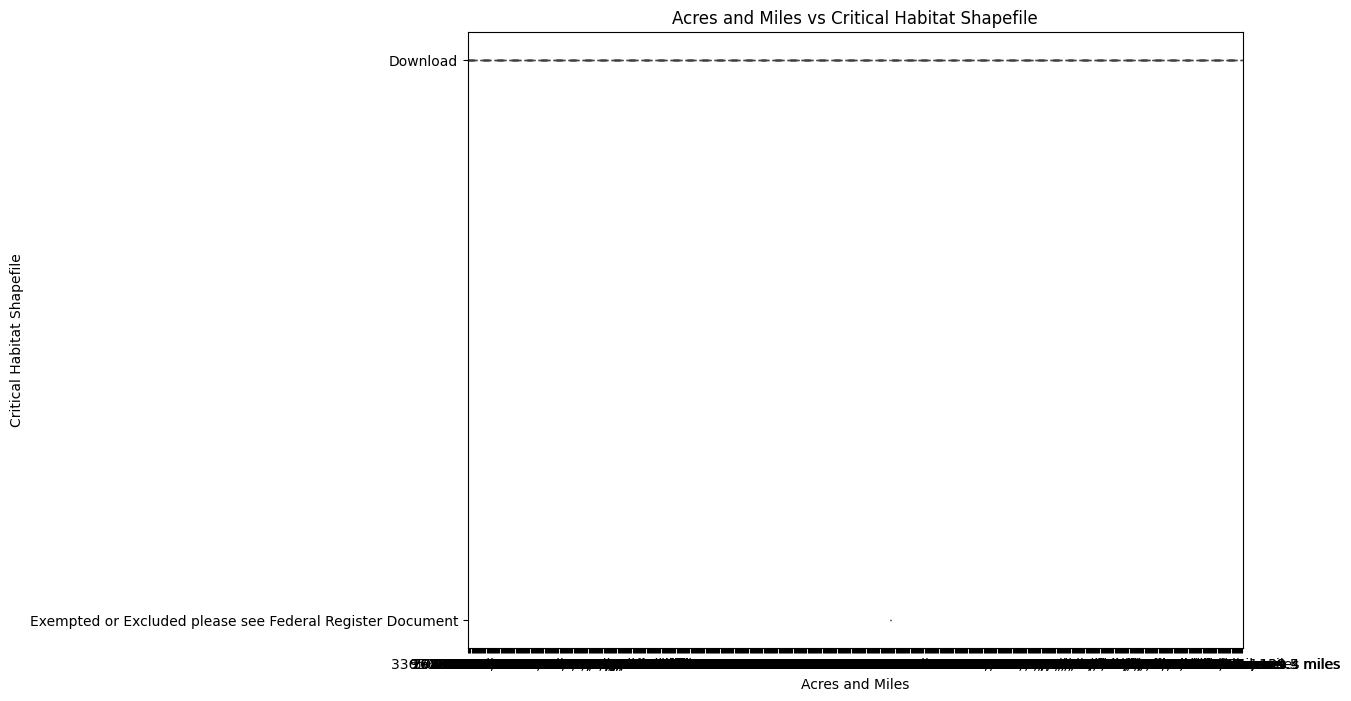

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Acres and Miles', y='Critical Habitat Shapefile', data=df)
plt.title('Acres and Miles vs Critical Habitat Shapefile')
#plt.xlabel('KPIs_met >80% (0: Not Met, 1: Met)')
plt.ylabel('Critical Habitat Shapefile')
plt.show()

# Question 2: Which of the 8 Fish and Wildlife Service {FWS}  regions require more funding/support from US Government?

sub-questions for these would be : Which FWS region has the largest acreage to take care of

Which FWS region has the most endangered species? does the endangered animal lives on land or in water bodies?

In [ ]:
df

,Entity ID,Common Name,Scientific Name,Where Listed,Species Group,FWS Lead Region,ESA Listing Status,Critical Habitat Type,Federal Register Publication,Critical Habitat Shapefile,tsn,Acres and Miles,Miles,Acres,Square Miles
0,1,"Bat, Indiana",Myotis sodalis,Wherever found,Mammals,Region 3,Endangered,Final,Federal Register (1977-09-22),Download,180001,9763890.9 acres,NaN,9763890.9,15256.079531
1,2,"Bear, grizzly",Ursus arctos horribilis,"U.S.A., conterminous (lower 48) States, except...",Mammals,Region 6,Threatened,Proposed,Federal Register (1976-11-05),Download,202385,375.3 miles,NaN,375.3,0.586406
2,7,"Manatee, West Indian",Trichechus manatus,Wherever found,Mammals,Region 4,Threatened,Proposed,Federal Register (2024-09-24),Download,180684,1988617.7 acres,NaN,1988617.7,3107.215156
3,7,"Manatee, West Indian",Trichechus manatus,Wherever found,Mammals,Region 4,Threatened,Final,Federal Register (1977-09-22),Download,180684,375.3 miles,NaN,375.3,0.586406
4,11,"Wolf, gray",Canis lupus,"U.S.A.: All of AL, AR, CA, CO, CT, DE, FL, GA,...",Mammals,Region 6,Endangered,Final,Federal Register (1978-03-09),Download,180596,375.3 miles,NaN,375.3,0.586406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,7206,"Flax, Carter's small-flowered",Linum carteri carteri,Wherever found,Flowering Plants,Region 4,Endangered,Final,Federal Register (2015-08-17),Download,528813,2591.6 acres,NaN,2591.6,4.049375
960,4420,"Brickell-bush, Florida",Brickellia mosieri,Wherever found,Flowering Plants,Region 4,Endangered,Final,Federal Register (2015-08-17),Download,36887,2570.1 acres,NaN,2570.1,4.015781
961,2211,"Prickly-apple, aboriginal",Harrisia (=Cereus) aboriginum (=gracilis),Wherever found,Flowering Plants,Region 4,Endangered,Final,Federal Register (2016-01-22),Download,195400,3352.7 acres,NaN,3352.7,5.238594
962,288,"Sucker, Lost River",Deltistes luxatus,Wherever found,Fishes,Region 8,Endangered,Final,Federal Register (2012-12-11),Download,163970,121691.5 acres; 139.5 miles,139.5,121691.5,190.142969


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Square Miles'].value_counts()

,count
Square Miles,
0.586406,104
11.398438,15
47.022031,12
0.000000,11
22.305156,10
...,...
16.307500,1
17.807031,1
298.495625,1


([], [], [])

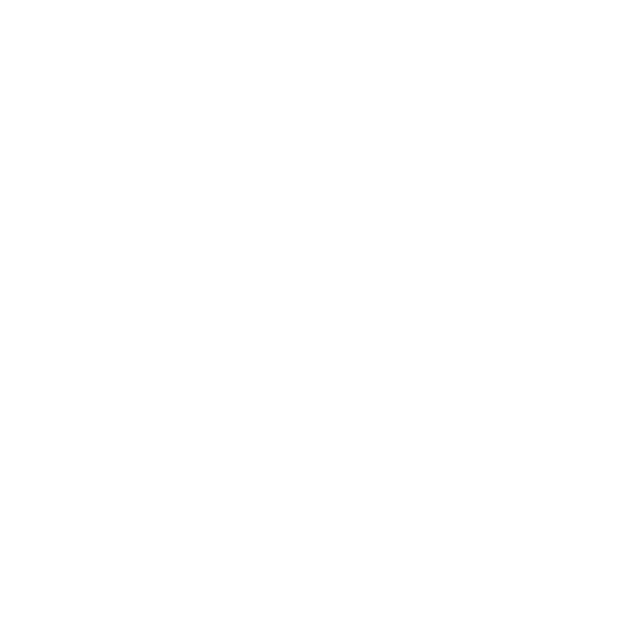

In [ ]:
endangered_counts = df[df['ESA Listing Status'] == 'endangered'].groupby('FWS Lead Region')['Scientific Name'].count()

plt.figure(figsize=(8, 8))
plt.pie(
    endangered_counts,
    labels=endangered_counts.index,
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
    startangle=140
)




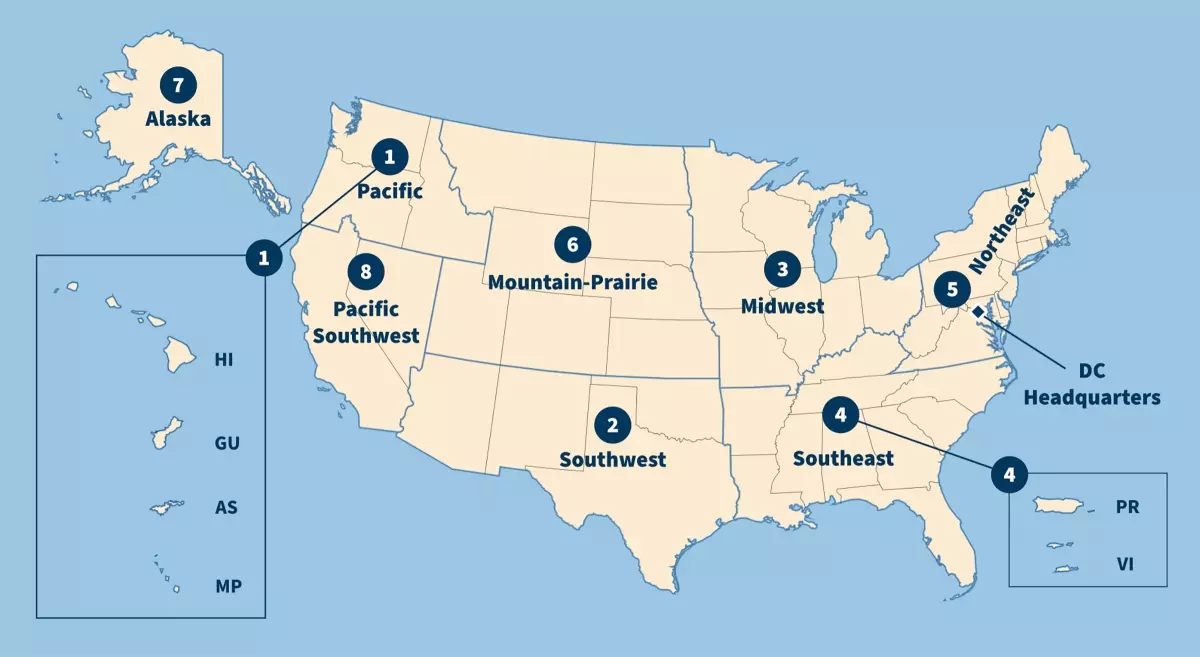